In [2]:
import pandas as pd  
import os
from pathlib import Path

path = Path('data')

In [5]:
data = pd.read_csv(path/'metadata.csv')
data

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train
...,...,...,...,...,...
23565,zzvv,36.708500,-121.749000,2014-12-02,test
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train
23568,zzyb,35.742000,-79.238600,2016-11-21,train


In [8]:
imgs = os.listdir(path/'s2')
len(imgs)

1156

From the 23507 samples I could only manage to download ??? from GEE.

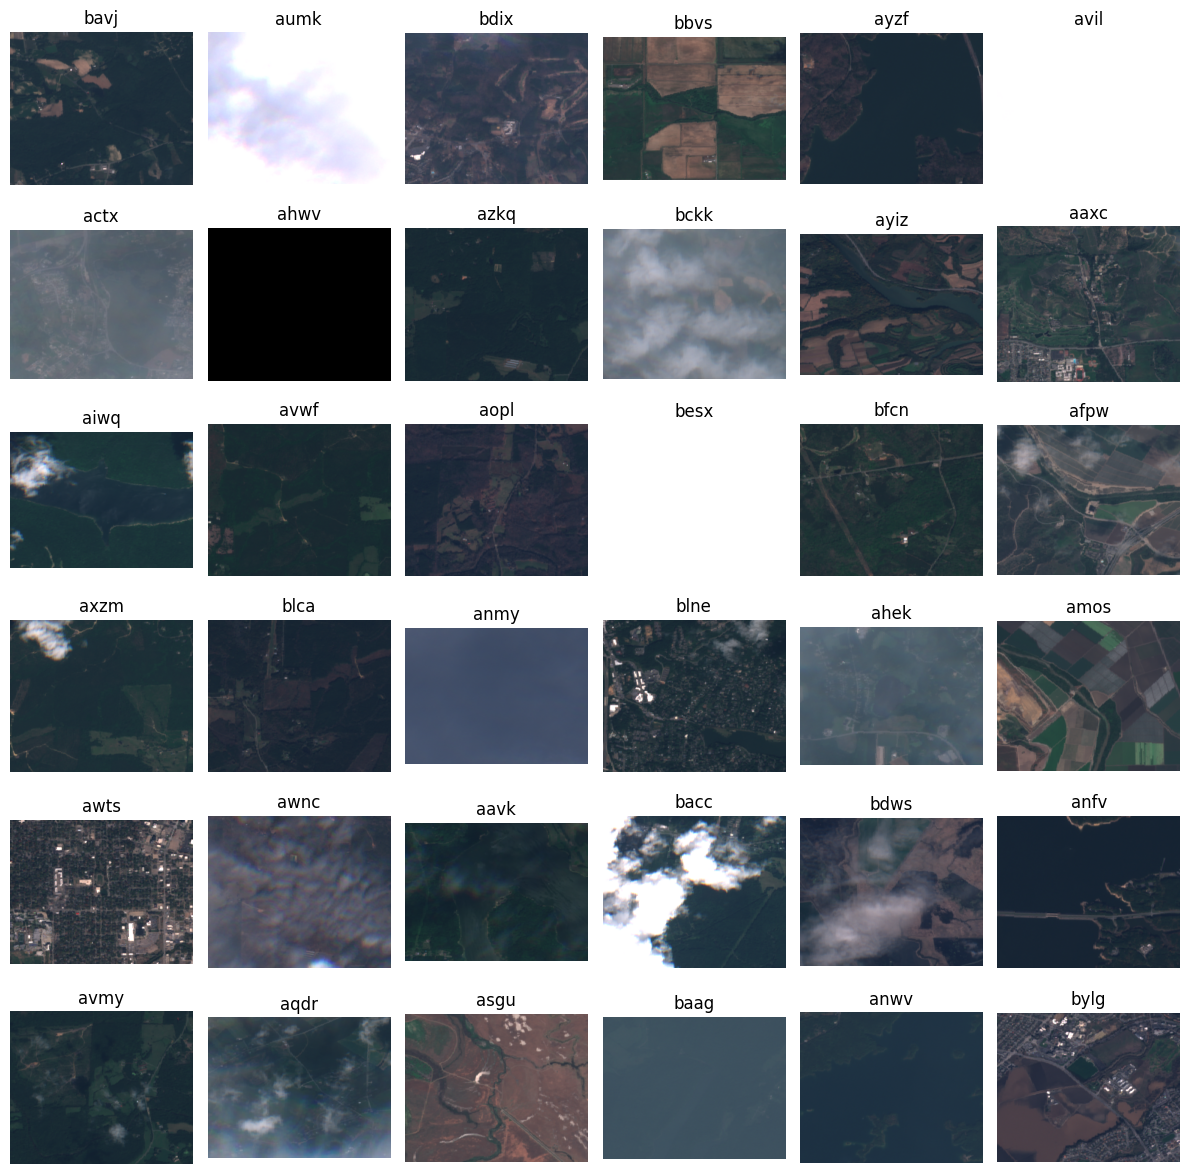

In [15]:
from skimage import io
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt

samples = np.random.choice(imgs, 36, replace=False)
r, c = 6, 6
fig, ax = plt.subplots(r, c, figsize=(12, 12))
for i in range(r):
	for j in range(c):
		bands = os.listdir(path/'s2'/samples[i*c+j])
		name = bands[0].split('.')[0]
		red = io.imread(f'{path}/s2/{samples[i*c+j]}/{name}.B4.tif')
		green = io.imread(f'{path}/s2/{samples[i*c+j]}/{name}.B3.tif')
		blue = io.imread(f'{path}/s2/{samples[i*c+j]}/{name}.B2.tif')
		img = np.dstack((red, green, blue))
		ax[i][j].imshow((img / 4000).clip(0,1))
		ax[i][j].axis('off')
		ax[i][j].set_title(samples[i*c+j])
plt.tight_layout()
plt.show()